In [123]:
import pandas as pd
import numpy as np

#Date stuff
from datetime import datetime
from datetime import timedelta

#Library for graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats


#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [124]:
credit= pd.read_csv("G:/Data Science Recorded Lectures/case studies/Final Projects/4. Segmentation of Credit Card Customers/CC_GENERAL.csv")

In [125]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [126]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [127]:
# Find the total number of missing values in the dataframe
print ("\nMissing values :  ", credit.isnull().sum().values.sum())

# printing total numbers of Unique value in the dataframe. 
print ("\nUnique values :  \n",credit.nunique())


Missing values :   314

Unique values :  
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [128]:
credit.shape

(8950, 18)

In [130]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### a) Missing Value Treatment

Since there are missing values in the data so we are imputing them with median.

In [9]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [131]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we need to remove with median.

credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)
credit['CREDIT_LIMIT'].count()


credit['MINIMUM_PAYMENTS'].median()
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)

In [132]:
# Now again check the missing values.

credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

## Deriving New KPI

1. Monthly average purchase and cash advance amount

Monthly_avg_purchase

In [133]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

In [134]:
print(credit['Monthly_avg_purchase'].head(),'\n ',
credit['TENURE'].head(),'\n', credit['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
  0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


#### Monthly_cash_advance Amount

In [135]:
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [136]:
credit[credit['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

### 2- Purchases by type (one-off, installments)
To find what type of purchases customers are making on credit card

In [137]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


### Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [138]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [139]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [140]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [141]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour

In [142]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [143]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [144]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

### 4. Limit_usage (balance to credit limit ratio ) credit card utilization
Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [145]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [146]:
credit['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

### 5- Payments to minimum payments ratio etc.

In [148]:
credit['PAYMENTS'].isnull().any()
credit['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [149]:
credit['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [150]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [151]:
credit['payment_minpay']

0        1.446508
1        3.826241
2        0.991682
3        0.000000
4        2.771075
5        0.581601
6       32.081820
7        1.276357
8        2.206280
9       11.612605
10       0.498597
11       4.536309
12       1.240830
13       6.593552
14       0.813816
15       0.944800
16       1.040881
17       3.477861
18       2.311048
19       0.084551
20       0.016454
21       1.251952
22      27.332818
23       6.649970
24       0.858615
25       1.320852
26       0.916592
27       1.261155
28       0.971251
29       1.006784
          ...    
8920     0.234940
8921     3.304997
8922     0.659354
8923     1.985987
8924     4.856447
8925     5.191574
8926    12.226247
8927     2.678503
8928     6.184871
8929     0.000000
8930     1.385733
8931     2.112821
8932     1.596541
8933     0.314676
8934     2.448965
8935     0.000000
8936     6.972789
8937     1.936734
8938    64.055621
8939     0.653714
8940     5.745025
8941     1.120950
8942     1.095102
8943     1.348973
8944     0

### Extreme value Treatment
Since there are variables having extreme values so I am doing log-transformation on the dataset to remove outlier effect

In [152]:
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [153]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [154]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [155]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [156]:
cr_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

### Insights from KPIs
Average payment_minpayment ratio for each purchse type

In [157]:
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.237, 13.259, 10.087,  5.571])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

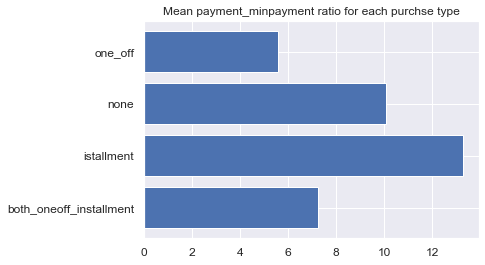

In [158]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

In [159]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


## customers with installment purchases are paying dues

In [160]:
credit[credit['purchase_type']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay


Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

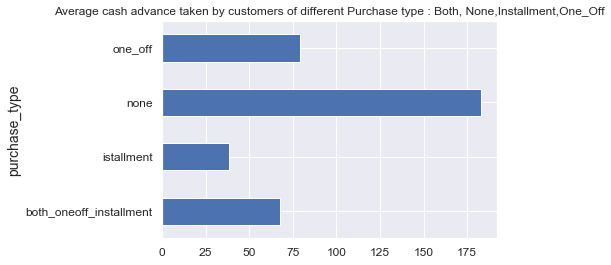

In [161]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

Customers who don't do either one-off or installment purchases take more cash on advance

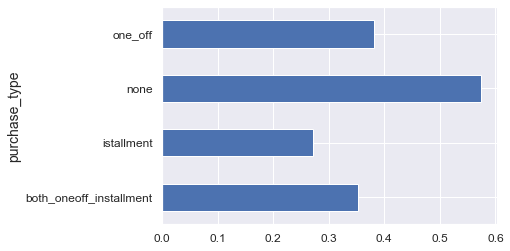

In [163]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

## Original dataset with categorical column converted to number type.

In [167]:
credit_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

### Preparing Machine learning algorithm
We do have some categorical data which need to convert with the help of dummy creation

In [165]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,1,0,0,0
9,0,0,0,1


## Now merge the created dummy with the original data frame

In [168]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [169]:
l=['purchase_type']

In [170]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
istallment                          False
none                                False
one_off                             False
dtype: bool

In [171]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE_FREQUENCY                   8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
Monthly_avg_purchase                8950 non-null float64
Monthly_cash_advance                8950 non-null float64
limit_usage                         8950 non-null float64
payment_minpay                      8950 non-null float64
both_oneoff_installment             8950 non-null uint8
istallment                          8950 non-null uint8
none                       

In [172]:
cr_dummy.head(3)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment,istallment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1


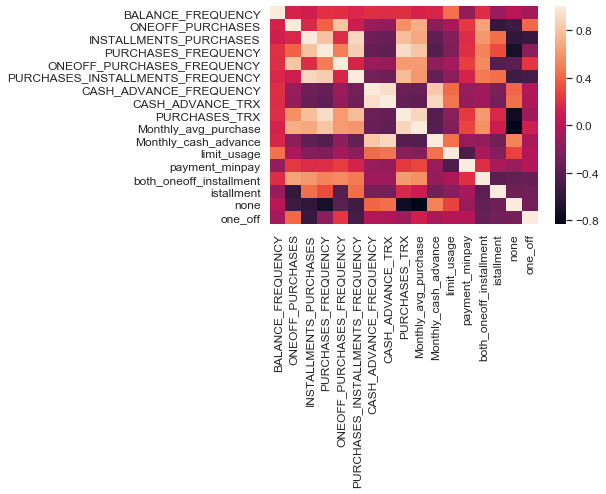

In [173]:
sns.heatmap(cr_dummy.corr())

- Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
Before applying PCA we will standardize data to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.


## Standardizing data


To put data on the same scale

In [174]:
from sklearn.preprocessing import  StandardScaler

In [175]:
sc=StandardScaler()

In [176]:
cr_dummy.shape

(8950, 17)

In [177]:
cr_scaled=sc.fit_transform(cr_dummy)

In [178]:
cr_scaled

array([[-0.149, -0.987,  0.394, ...,  1.721, -0.544, -0.515],
       [ 0.18 , -0.987, -1.087, ..., -0.581,  1.839, -0.515],
       [ 0.493,  1.062, -1.087, ..., -0.581, -0.544,  1.943],
       ...,
       [-0.093, -0.987,  0.528, ...,  1.721, -0.544, -0.515],
       [-0.093, -0.987, -1.087, ..., -0.581,  1.839, -0.515],
       [-0.734,  1.169, -1.087, ..., -0.581, -0.544,  1.943]])

## Applying PCA
With the help of principal component analysis we will reduce features

In [179]:
from sklearn.decomposition import PCA

In [180]:
cr_dummy.shape

(8950, 17)

In [181]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

In [182]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

0.9999999999999999

In [183]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [184]:
var_ratio

{2: 0.5826439793960279,
 3: 0.7299379309512706,
 4: 0.8115442762351258,
 5: 0.8770555795291438,
 6: 0.9186492443512609,
 7: 0.9410925256030129,
 8: 0.9616114053683058,
 9: 0.9739787081990651,
 10: 0.9835896584630702,
 11: 0.9897248107341952,
 12: 0.9927550009135231,
 13: 0.9953907562385425,
 14: 0.9979616898169593,
 15: 0.9996360473172954,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

## Since 6 components are explaining about 90% variance so we select 6 components

In [185]:
pc=PCA(n_components=6)

In [186]:
p=pc.fit(cr_scaled)

In [187]:
cr_scaled.shape

(8950, 17)

In [188]:
p.explained_variance_

array([6.836, 3.07 , 2.504, 1.387, 1.114, 0.707])

In [189]:
np.sum(p.explained_variance_)

15.618782269308788

In [190]:
np.sum(p.explained_variance_)

15.618782269308788

In [191]:
var_ratio

{2: 0.5826439793960279,
 3: 0.7299379309512706,
 4: 0.8115442762351258,
 5: 0.8770555795291438,
 6: 0.9186492443512609,
 7: 0.9410925256030129,
 8: 0.9616114053683058,
 9: 0.9739787081990651,
 10: 0.9835896584630702,
 11: 0.9897248107341952,
 12: 0.9927550009135231,
 13: 0.9953907562385425,
 14: 0.9979616898169593,
 15: 0.9996360473172954,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

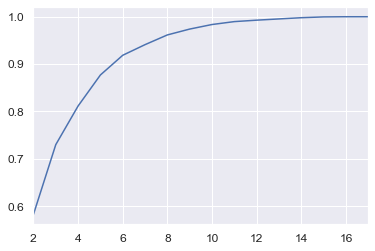

In [192]:
pd.Series(var_ratio).plot()

## Since 5 components are explaining about 87% variance so we select 5 components

In [193]:
cr_scaled.shape

(8950, 17)

In [194]:
pc_final=PCA(n_components=6).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)


In [195]:
dd=pd.DataFrame(reduced_cr)

In [75]:
dd.head()

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214


### So initially we had 17 variables now its 5 so our variable go reduced

In [196]:
dd.shape

(8950, 6)

In [197]:
col_list=cr_dummy.columns

In [198]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'istallment', 'none', 'one_off'],
      dtype='object')

In [199]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681,-0.693816
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197,0.129094
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181,0.115223
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948,-0.081879
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279,-0.097299
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871,0.006731
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132,0.066589
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753,0.082307
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971,-0.009402
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147,0.015878


### So above data gave us eigen vector for each component we had all eigen vector value very small we can remove those variable but in our case its not.

In [200]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

## Clustering
Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.

In [201]:
from sklearn.cluster import KMeans

In [202]:
km_4=KMeans(n_clusters=4,random_state=123)

In [203]:
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [204]:
km_4.labels_

array([2, 1, 0, ..., 2, 1, 0])

In [205]:
pd.Series(km_4.labels_).value_counts()

3    2769
2    2224
1    2088
0    1869
dtype: int64

### Here we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21.

## Identify cluster Error

In [206]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [207]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,139772.482528
1,2,93308.704727
2,3,70745.011094
3,4,49446.066485
4,5,42548.525149
5,6,37712.952211
6,7,34124.527416
7,8,31285.586485
8,9,28865.940286
9,10,26318.643498


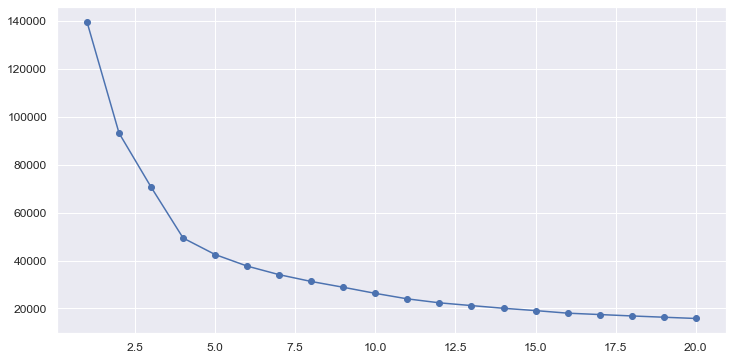

In [209]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

From above graph we will find below range. here it is 4,5,6

### Silhouette Coefficient

In [210]:
from sklearn import metrics

In [211]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [212]:
scores

[0.3319452179234267,
 0.35403115118922474,
 0.43708577439659474,
 0.43121145209717765,
 0.4228144914653746,
 0.40224408261793554,
 0.41445372986226187,
 0.38892407130869155,
 0.39299913554746213,
 0.36787983742685676,
 0.3669766371659528,
 0.3403473055008083,
 0.35269668686564065,
 0.3439233788957459,
 0.3336956707851422,
 0.3223166820085196,
 0.33229025814273955,
 0.3274102528436649,
 0.3239792346891928]

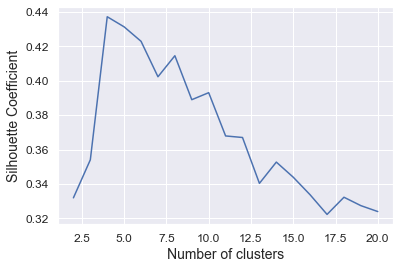

In [214]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

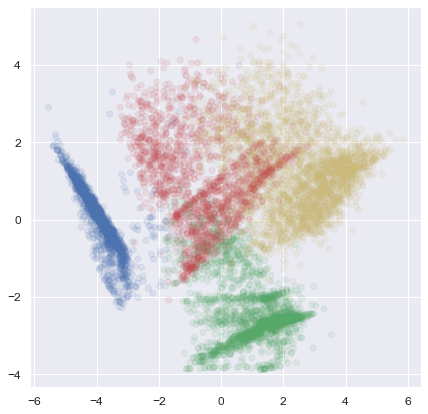

In [215]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.1)

### It is very difficult to draw individual plot for cluster, so we will use pair plot which will provide us all graph in one shot. To do that we need to take following steps

In [216]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(6)])

In [217]:
df_pair_plot['Cluster']=km_4.labels_ #Add cluster column in the data frame

In [218]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755,2
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463,1
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932,0
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986,0
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214,0


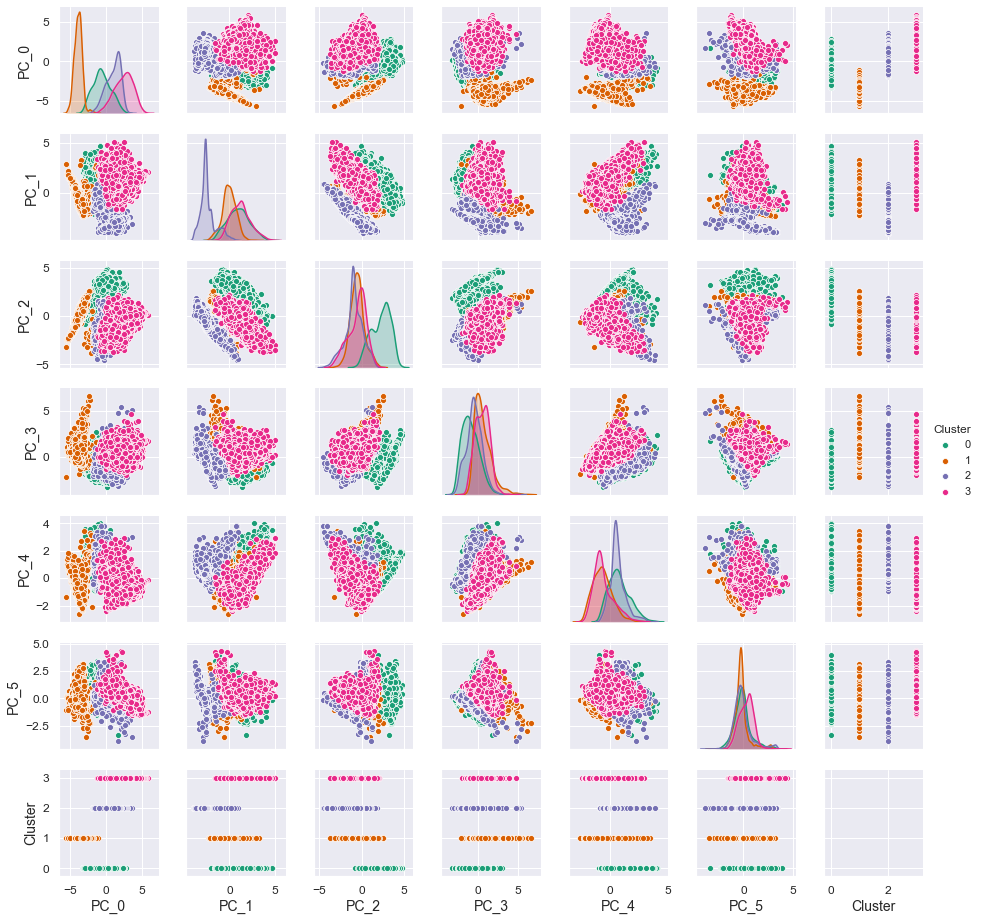

In [219]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [220]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables.

col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','istallment','one_off','none','CREDIT_LIMIT']

In [221]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [222]:
# Conactenate labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [223]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,istallment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,2
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,0
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,0


In [224]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.127341,0.043582,12.062050,33.013723
Monthly_avg_purchase,69.875917,0.148297,47.626256,193.008043
Monthly_cash_advance,78.098613,186.281319,33.550080,67.466910
limit_usage,0.379761,0.576076,0.264745,0.353591
CASH_ADVANCE_TRX,2.881220,6.540230,1.021133,2.804261
payment_minpay,5.573672,9.936617,13.422420,7.245651
both_oneoff_installment,0.000535,0.001916,0.000000,1.000000
istallment,0.000000,0.017241,1.000000,0.000000
one_off,0.999465,0.002874,0.000000,0.000000
none,0.000000,0.977969,0.000000,0.000000


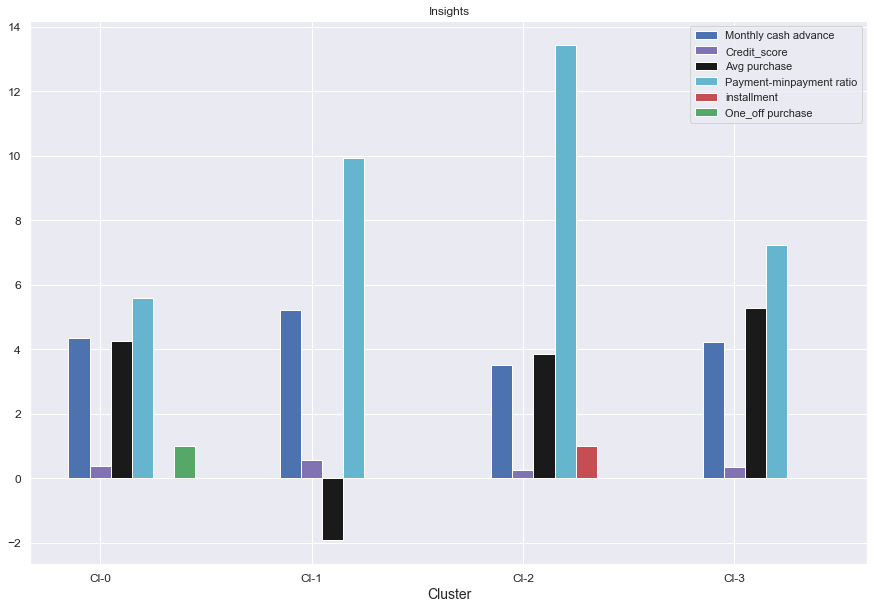

In [225]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

## Insights

Clusters are clearly distinguishing behavior within customers


Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively good credit score. This group is about 31% of the total customer base


cluster 1 is taking maximum advance_cash and is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. This group is about 23% of the total customer base


Cluster 0 customers are doing maximum One_Off transactions and least payment ratio. This group is about 21% of the total customer base


Cluster 3 customers have maximum credit score and are paying dues and are doing maximum installment purchases. This group is about 25% of the total customer base

In [226]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    1869
1          1    2088
2          2    2224
3          3    2769
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  1869   20.882682
1  2088   23.329609
2  2224   24.849162
3  2769   30.938547


### Finding behaviour with 5 Clusters:

In [227]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([4, 2, 0, ..., 4, 2, 0])

In [228]:
pd.Series(km_5.labels_).value_counts()

4    2149
2    2081
1    1977
0    1862
3     881
dtype: int64

Text(0, 0.5, 'PC_1')

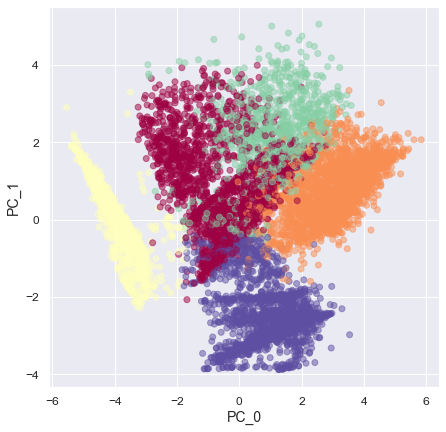

In [229]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [230]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [231]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,7.096670,34.587759,0.032196,27.703746,11.905537
Monthly_avg_purchase,68.917645,210.536468,0.086126,141.584086,47.369817
Monthly_cash_advance,74.517541,4.040708,185.038534,249.942101,20.636870
limit_usage,0.377959,0.258931,0.576110,0.600096,0.250011
CASH_ADVANCE_TRX,2.697637,0.152757,6.448823,10.384790,0.550489
payment_minpay,5.562287,8.675499,9.963172,3.651686,13.783426
both_oneoff_installment,0.002148,1.000000,0.000000,0.900114,0.000000
istallment,0.000000,0.000000,0.015858,0.088536,1.000000
one_off,0.997852,0.000000,0.002883,0.011351,0.000000
none,0.000000,0.000000,0.981259,0.000000,0.000000


## Conclusion With 5 clusters :
we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side

In [232]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)


Cluster_5   
0          0    1862
1          1    1977
2          2    2081
3          3     881
4          4    2149
Name: Cluster_5, dtype: int64


In [233]:
# percentage of each cluster

print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  1862   20.804469
1  1977   22.089385
2  2081   23.251397
3   881    9.843575
4  2149   24.011173


## Finding behavior with 6 clusters

In [234]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([2, 0, 3, ..., 2, 0, 4])

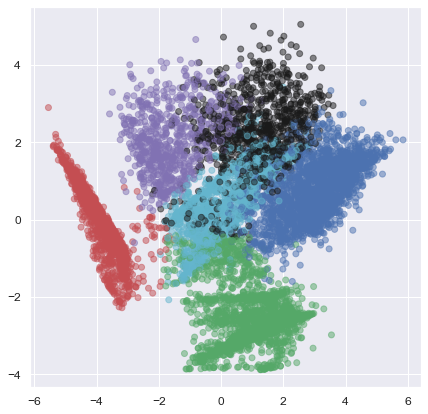

In [235]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [236]:
cluster_df_6 = pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [237]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,0.030347,34.663789,11.905537,7.764159,5.958512,27.919908
Monthly_avg_purchase,0.088891,211.196582,47.369817,78.709899,53.845679,140.374727
Monthly_cash_advance,184.829434,4.027720,20.636870,3.664199,205.688263,242.856971
limit_usage,0.575724,0.258206,0.250011,0.245953,0.606140,0.600654
CASH_ADVANCE_TRX,6.434971,0.150838,0.550489,0.125951,7.652361,10.000000
payment_minpay,9.976487,8.702974,13.783426,6.907951,3.259302,3.616973
both_oneoff_installment,0.000000,1.000000,0.000000,0.006762,0.000000,0.911899
istallment,0.016378,0.000000,1.000000,0.000000,0.000000,0.088101
one_off,0.000000,0.000000,0.000000,0.993238,1.000000,0.000000
none,0.983622,0.000000,0.000000,0.000000,0.000000,0.000000


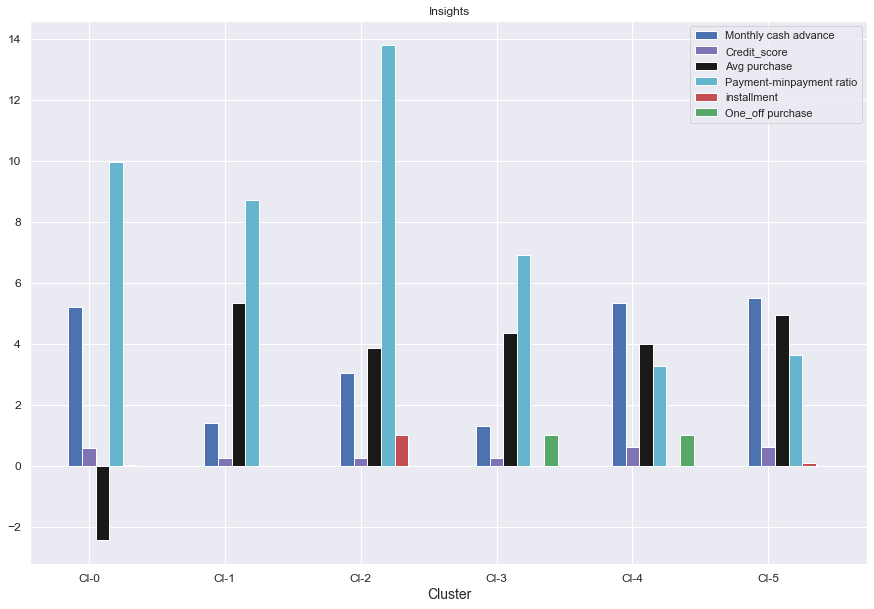

In [238]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['istallment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [239]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([5.219, 1.393, 3.027, 1.299, 5.326, 5.492])

## Conclusion with 6 clusters:
Here also groups are overlapping.

Cl-0 and Cl-2 behaving same

### Checking performance metrics for Kmeans
I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [240]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [241]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

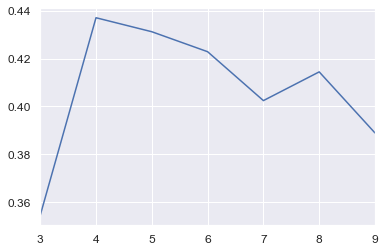

In [242]:
pd.Series(score).plot()

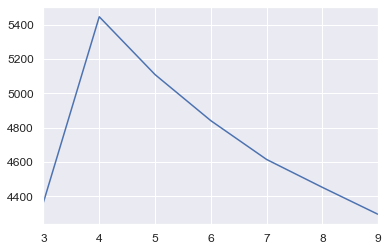

In [243]:
pd.Series(score_c).plot()

Performance metrics also suggest that K-means with 4 cluster is able to show distinguished characteristics of each cluster.

### Insights with 4 Clusters

Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively good credit score. This group is about 31% of the total customer base


cluster 1 is taking maximum advance_cash and is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. This group is about 23% of the total customer base


Cluster 0 customers are doing maximum One_Off transactions and least payment ratio and credit_score on lower side This group is about 21% of the total customer base


Cluster 3 customers have maximum credit score and are paying dues and are doing maximum installment purchases. This group is about 25% of the total customer base

## Marketing Strategy Suggested:

a. Group 2
They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score ) -- we can increase credit limit or can lower down interest rate -- Can be given premium card /loyality cards to increase transactions


b. Group 1
They have poor credit score and taking only cash on advance. We can target them by providing less interest rate on purchase transaction

c. Group 0
This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.


d. Group 3
This group is performing best among all as cutomers are maintaining good credit score and paying dues on time. -- Giving rewards point will make them perform more purchases.